In [1]:
import fitsio
from matplotlib import pyplot as plt
import numpy as np

In [2]:
#Load in file with VI info for ELGs
f = fitsio.read('/global/cfs/cdirs/desi/survey/catalogs/SV1/redshift_comps/blanc/v2/ELG/80608_ELGzinfo_wVI.fits')

In [3]:
#let's just compare how the VI redshifts compare to those in the deep reduction
wd = f['subset'] == 'deep'
fd = f[wd] #fd now only contains the deep subset

In [4]:
#select results for comparison
wz = fd['ZWARN'] == 0 #redrock did not throw a flag
wz &= fd['FIBERSTATUS'] == 0 #the fiber was properly placed on target
wz &= fd['DELTACHI2'] > 100 #the delta chi2 in the deep coadd is at a level that might not throw a flag for a normal exposure
wz &= fd['Z'] > 0.6 #we are above the minimum redshift of interest
wz &= fd['Z'] < 1.6 #we are below the maximum redshift of interest
wz &= fd['N_VI'] > 0 #there was at least one VI
print(len(fd[wz]))

1997


In [5]:
#select down to that
fz = fd[wz]

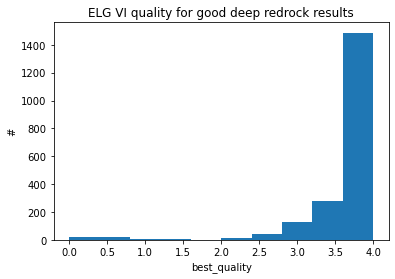

In [8]:
#look at a histogram of the VI reported quality
plt.hist(fz['best_quality'])
plt.xlabel('best_quality')
plt.ylabel('#')
plt.title('ELG VI quality for good deep redrock results')
plt.show()

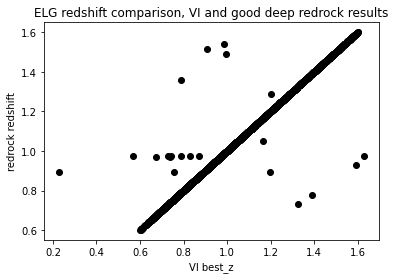

In [9]:
#compare redshifts
plt.plot(fz['best_z'],fz['Z'],'ko')
plt.xlabel('VI best_z')
plt.ylabel('redrock redshift')
plt.title('ELG redshift comparison, VI and good deep redrock results')
plt.show()

In [10]:
#find outlier fraction
wb = abs(fz['best_z']-fz['Z']) > 0.005
print('outlier fraction is '+str(len(fz[wb])/len(fz)))

outlier fraction is 0.010515773660490736


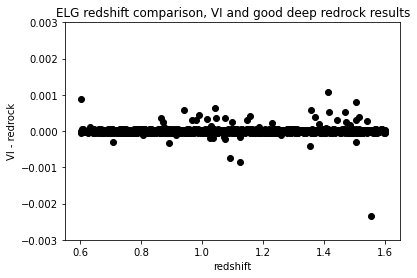

In [15]:
#plot differences, excluding outliers
plt.plot(fz[~wb]['best_z'],fz[~wb]['best_z']-fz[~wb]['Z'],'ko')
plt.ylim(-0.003,.003)
plt.xlabel('redshift')
plt.ylabel('VI - redrock')
plt.title('ELG redshift comparison, VI and good deep redrock results')
plt.show()